<a href="https://colab.research.google.com/github/ASM650/SADAIA_Bootcamp/blob/main/SDAIA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arabic Dialects Recognition

##### Done By: Amjad Al-Musallam

# Importing library and Reading data

In [ ]:
! pip install pyarabic

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import plotly.express as px
import tensorflow as tf
import re
import string
import nltk
nltk.download('punkt')
from pyarabic.araby import strip_harakat

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Project_SDAIA/train_SADA.csv')
#train_df.sample(2)

In [ ]:
val_df = pd.read_csv('/content/drive/MyDrive/Project_SDAIA/valid_SADA.csv')
#val_df.sample(2)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Project_SDAIA/test_SADA.csv')
#test_df.sample(2)

In [ ]:
combined_df = pd.concat([train_df, val_df], axis=0)

In [ ]:
combined_df.head(4)

,Unnamed: 0,FileName,ShowName,FullFileLength,SegmentID,SegmentLength,SegmentStart,SegmentEnd,SpeakerAge,SpeakerGender,SpeakerDialect,Speaker,Environment,GroundTruthText,ProcessedText,Category
0,0,batch_1/6k_SBA_100_0.wav,الجفاف يقتل الندى,605.3,6k_SBA_100_0-seg_249_720-251_840,2.12,249.72,251.84,Elderly -- كبير في السن,Male,Najdi,Speaker1متحدث,Clean -- نظيف,ووضّح كلامك يا مغيث,ووضح كلامك يا مغيث,درامي
1,1,batch_1/6k_SBA_100_0.wav,الجفاف يقتل الندى,605.3,6k_SBA_100_0-seg_252_700-255_300,2.60,252.70,255.30,Elderly -- كبير في السن,Male,Najdi,Speaker1متحدث,Clean -- نظيف,ترى رأسي ما عاد يتحمّل ألغازك.,ترى راسي ما عاد يتحمل الغازك,درامي
2,2,batch_1/6k_SBA_100_0.wav,الجفاف يقتل الندى,605.3,6k_SBA_100_0-seg_256_010-258_180,2.17,256.01,258.18,Elderly -- كبير في السن,Male,Najdi,Speaker2متحدث,Clean -- نظيف,سلامة رأسك يا أبو مسامح.,سلامة راسك يا ابو مسامح,درامي
3,3,batch_1/6k_SBA_100_0.wav,الجفاف يقتل الندى,605.3,6k_SBA_100_0-seg_259_560-263_060,3.50,259.56,263.06,Elderly -- كبير في السن,Male,Najdi,Speaker2متحدث,Music -- موسيقى,ما يصير يا أبو مسامح تخلّي البنت في البيت دون ...,ما يصير يا ابو مسامح تخلي البنت في البيت دون امها,درامي


In [ ]:
print('The Dataset contents',combined_df.shape[0], 'Rows, and', combined_df.shape[1],'Columns.')
print('Test dataset contents',test_df.shape[0], 'Rows, and', test_df.shape[1],'Columns.')

The Dataset contents 246973 Rows, and 16 Columns.
Test dataset contents 6193 Rows, and 16 Columns.


In [ ]:
print('The Dataset contents', combined_df[combined_df.duplicated()].shape[0],'duplicated rows.')
print('Test dataset contents', test_df[test_df.duplicated()].shape[0],'duplicated rows.')

The Dataset contents 0 duplicated rows.
Test dataset contents 0 duplicated rows.


# Feature Engineering

In [ ]:
# chack for nall values
combined_df.isna().sum()

Unnamed: 0           0
FileName             0
ShowName             0
FullFileLength       0
SegmentID            0
SegmentLength        0
SegmentStart         0
SegmentEnd           0
SpeakerAge           0
SpeakerGender        0
SpeakerDialect       0
Speaker              0
Environment          0
GroundTruthText      1
ProcessedText      210
Category             0
dtype: int64

In [ ]:
#test_df.isna().sum()

In [ ]:
# dropping null values
combined_df = combined_df.dropna()
# I will drop the ProcessedText and clean the GroundTruthText instead
combined_df.drop(['ProcessedText'], axis = 1, inplace = True)
test_df.drop(['ProcessedText'], axis = 1, inplace = True)

In [ ]:
#combined_df.head(2)

In [ ]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' # define arabic punctuations

def clean_text(text):
    '''
    DESCRIPTION:
    This function to clean text
    INPUT:
    text: string
    OUTPUT:
    text: string after clean it
    '''
    text = strip_harakat(text)
    text = text.translate(str.maketrans('','', arabic_punctuations)) # remove punctuation
    text = re.sub(' +', ' ',text) # remove extra space
    text = text.strip() #remove whitespaces

    text = text.replace("\n", "")
    text = text.replace("-", "")
    text = text.replace("--", "")
    text = text.replace("››", "")
    text = text.replace("‹‹", "")
    text = text.replace("‰", "")
    text = text.replace("••", "")
    text = text.replace("•", "")
    text = text.replace("’", "")
    text = text.replace("‘", "")
    text = text.replace("|", "")
    text = text.replace(";", "")
    text = text.replace("?", "")
    text = text.replace("«", "")
    text = text.replace("·", "")
    text = text.replace("»", "")
    text = text.replace("#", "")

    return text

In [ ]:
from nltk import word_tokenize

def stopWordRmove(Tweet):
    arabic_stopwords = open("/content/drive/MyDrive/Project_SDAIA/arabic_dialects_stopwords.csv", "r")
    stop_words = arabic_stopwords.read().split('\n')
    needed_words = []
    words = word_tokenize(Tweet)
    for w in words:
        if w not in (stop_words):
            needed_words.append(w)
    filtered_sentence = " ".join(needed_words)
    return filtered_sentence

In [ ]:
# The cleaning function applied in all rows
combined_df['Cleaned_Text'] = combined_df['GroundTruthText'].apply(clean_text)
# remove stopwords
combined_df['Cleaned_Text'] = combined_df['Cleaned_Text'].apply(stopWordRmove)

In [ ]:
# same for test set
test_df['Cleaned_Text'] = test_df['GroundTruthText'].apply(clean_text)
test_df['Cleaned_Text'] = test_df['Cleaned_Text'].apply(stopWordRmove)

In [ ]:
combined_df.SpeakerDialect.value_counts()

Najdi                                92895
More than 1 speaker اكثر من متحدث    51149
Hijazi                               35350
Unknown                              29954
Khaliji                              29164
ModernStandardArabic                  4145
Egyptian                              2075
Levantine                              966
Yemeni                                 400
Notapplicable                          391
Shamali                                128
Janubi                                 103
Maghrebi                                41
Iraqi                                    2
Name: SpeakerDialect, dtype: int64

In [ ]:
test_df.SpeakerDialect.value_counts()

Najdi                                1704
More than 1 speaker اكثر من متحدث    1320
Khaliji                              1150
Hijazi                                809
Unknown                               765
Notapplicable                         167
ModernStandardArabic                  157
Egyptian                               96
Shamali                                18
Yemeni                                  7
Name: SpeakerDialect, dtype: int64

In [ ]:
# just renaming
combined_df['SpeakerDialect'].replace(['More than 1 speaker اكثر من متحدث'],["More than one speaker"],inplace=True)
test_df['SpeakerDialect'].replace(['More than 1 speaker اكثر من متحدث'],["More than one speaker"],inplace=True)

##### I need to drop some classes like Unknown, Not Applicable and classes below 100, and instead of having Najdi, hijazi, shmali and Janubi I will merge them under one class which is Saudi

In [ ]:
combined_df['SpeakerDialect'].replace(['Najdi'],["Saudi"],inplace=True)

combined_df['SpeakerDialect'].replace({'Hijazi':'Saudi'},inplace=True)
combined_df['SpeakerDialect'].replace({'Shamali':'Saudi'},inplace=True)
combined_df['SpeakerDialect'].replace({'Janubi':'Saudi'},inplace=True)

# when I drop the clsess at this way, it gives me a lot of null values
# filter = ~combined_df['SpeakerDialect'].isin(["Unknown", "Notapplicable", "Maghrebi","Iraqi"])
# combined_df['SpeakerDialect'] = combined_df['SpeakerDialect'][filter]

# So, I used drop function
combined_df = combined_df.drop(combined_df[combined_df['SpeakerDialect'] == 'Unknown'].index)
combined_df = combined_df.drop(combined_df[combined_df['SpeakerDialect'] == 'Notapplicable'].index)
combined_df = combined_df.drop(combined_df[combined_df['SpeakerDialect'] == 'Maghrebi'].index)
combined_df = combined_df.drop(combined_df[combined_df['SpeakerDialect'] == 'Iraqi'].index)
combined_df = combined_df.drop(combined_df[combined_df['SpeakerDialect'] == 'Levantine'].index)
combined_df = combined_df.drop(combined_df[combined_df['SpeakerDialect'] == 'More than one speaker'].index)

In [ ]:
combined_df.SpeakerDialect.value_counts()

Saudi                   127022
Khaliji                  28713
ModernStandardArabic      4129
Egyptian                  2065
Yemeni                     396
Name: SpeakerDialect, dtype: int64

In [ ]:
num_clasess = combined_df.SpeakerDialect.nunique()

In [ ]:
test_df['SpeakerDialect'].replace(['Najdi'],["Saudi"],inplace=True)
test_df['SpeakerDialect'].replace({'Hijazi':'Saudi'},inplace=True)
test_df['SpeakerDialect'].replace({'Shamali':'Saudi'},inplace=True)

test_df = test_df.drop(test_df[test_df['SpeakerDialect'] == 'Unknown'].index)
test_df = test_df.drop(test_df[test_df['SpeakerDialect'] == 'Notapplicable'].index)
test_df = test_df.drop(test_df[test_df['SpeakerDialect'] == 'More than one speaker'].index)

test_df.SpeakerDialect.value_counts()

Saudi                   2531
Khaliji                 1150
ModernStandardArabic     157
Egyptian                  96
Yemeni                     7
Name: SpeakerDialect, dtype: int64

# EDA

In [ ]:
! pip install arabic_reshaper
! pip install python-bidi

In [ ]:
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, ImageColorGenerator

In [ ]:
# This is to make the Arabic letters connected
font_file = '/content/drive/MyDrive/Project_SDAIA/arial.ttf'

#### I took the function below from this notebook: https://www.kaggle.com/code/amjadkhatabi/arabic-word-clouds-text-processing-rendering

##### I hope its fine to do this :)

In [ ]:
def column_to_wordcloud(df, column, font_file):
    """
    Parameters:
      df: the dataframe that contains the column
      column: the name of the column that contains the text
      font_file: the path to the font file for Arabic characters
      stopwords: a list of words to exclude from the wordcloud

    Outputs:
        None. The function only displays the word cloud image.
    """
    text = " ".join(arabic_reshaper.reshape(t) for t in df[column].dropna())
    # create and display the wordcloud
    wordcloud = WordCloud(font_path=font_file, width = 3500, height = 2000, random_state=1, background_color='white',
                          colormap='Set2', collocations=False).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

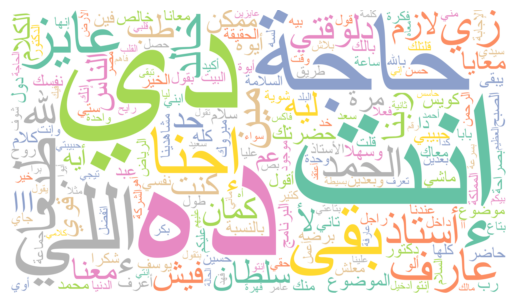

In [ ]:
column_to_wordcloud(combined_df[combined_df["SpeakerDialect"]=="Egyptian"],"Cleaned_Text",font_file)

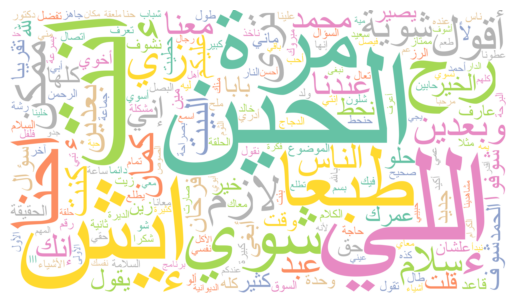

In [ ]:
column_to_wordcloud(combined_df[combined_df["SpeakerDialect"]=="Saudi"],"Cleaned_Text",font_file)

In [ ]:
dist =[combined_df.SpeakerDialect.value_counts().index,combined_df.SpeakerDialect.value_counts().values]
dist = pd.DataFrame(dist)
dist = dist.T
dist.columns = ["Dialect", "Total"]

total_count = dist["Total"].sum()
dist["Percentage"] = (dist["Total"] / total_count) * 100

fig = px.bar(dist,x='Dialect', y= 'Total',text='Percentage',
             title='Distribuation of speakers based on Dialect')
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.show()

#### it's very clear that we have an imbalance problem

# Feature Selection

In [ ]:
X = combined_df.Cleaned_Text
Y = combined_df.SpeakerDialect

le = LabelEncoder()
Y = le.fit_transform(Y)


X_test = test_df.Cleaned_Text
y_test = test_df.SpeakerDialect

y_test = le.fit_transform(y_test)

# ML Models

In [ ]:
# from sklearn.utils import compute_class_weight

# class_weights = compute_class_weight(
#                                         class_weight = "balanced",
#                                         classes = np.unique(y_train),
#                                         y = y_train
#                                     )
# class_weights = dict(zip(np.unique(y_train), class_weights))
# class_weights

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [ ]:
#import sklearn
#sklearn.metrics.get_scorer_names()

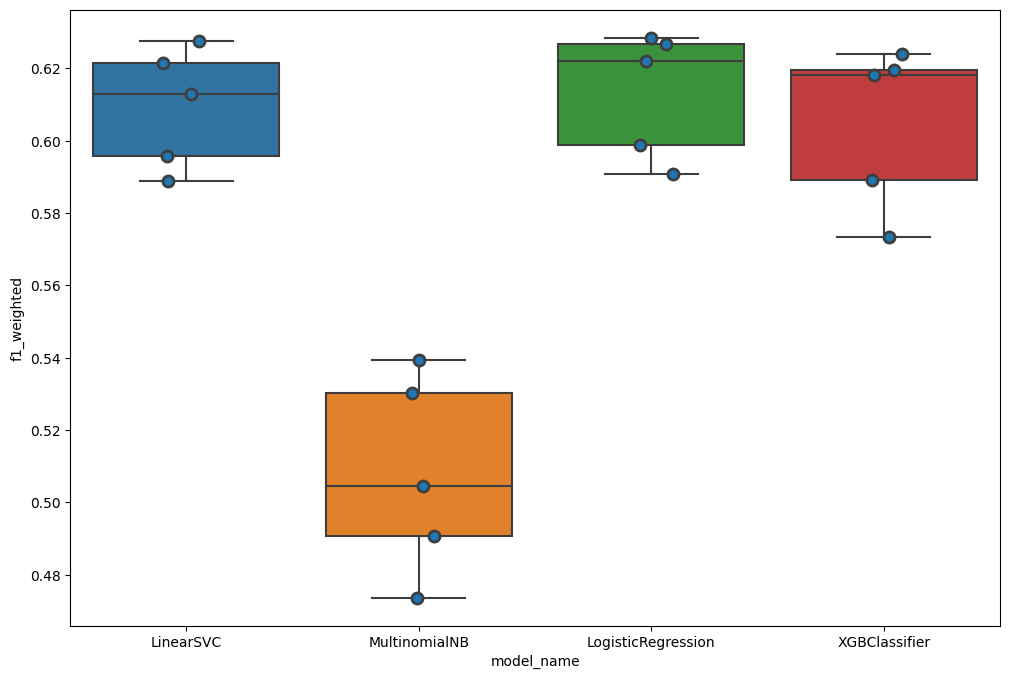

model_name
LinearSVC             0.609359
LogisticRegression    0.613434
MultinomialNB         0.507671
XGBClassifier         0.604855
Name: f1_weighted, dtype: float64

In [ ]:
# Build ML - NLP Model and choose the best performing one
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score


models = [
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=1998, max_iter=1000),
    XGBClassifier()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_tfidf, Y, scoring='f1_weighted', cv=CV)
  for fold_idx, f1_weighted in enumerate(accuracies):
    entries.append((model_name, fold_idx,f1_weighted))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'f1_weighted'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='model_name', y='f1_weighted', data=cv_df)
sns.stripplot(x='model_name', y='f1_weighted', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
cv_df.groupby('model_name').f1_weighted.mean()

#### The best model was LogisticRegression with 61%


In [ ]:
model =LogisticRegression(random_state=1998, max_iter=1000)
Lr = model.fit(X_tfidf,Y)

In [ ]:
# eval on test set
X_test_tfidf = tfidf_vectorizer.fit_transform(X_test)
y_eval = Lr.predict(X_test_tfidf)
print(metrics.classification_report(y_test, y_eval))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        96
           1       0.29      0.01      0.01      1150
           2       0.00      0.00      0.00       157
           3       0.62      0.40      0.49      1320
           4       0.52      0.90      0.66      2531

    accuracy                           0.54      5254
   macro avg       0.28      0.26      0.23      5254
weighted avg       0.47      0.54      0.44      5254



#### As you can see the best model does not predict the minimum classes, so we need better than that.

# AraBERT Model

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.0 MB/s eta 0:00:00


In [ ]:
! pip install arabert
! pip install farasapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186459 sha256=6b9094d1ae6639a2c371f5dad204d199960b5c4dc93c0d81f49cabf3214698c6
  Stored in directory: /root/.cache/pip/wheels/10/f0/fd/4813b1177405693e8da9cdea839f0fb64fde161380e058c827
Successfully built emoji


In [ ]:
from arabert.preprocess import ArabertPreprocessor
model_name="bert-base-arabert"
arabert_prep = ArabertPreprocessor(model_name=model_name)

[2023-09-20 18:11:35,782 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


In [ ]:
X_Arabert_tok = combined_df['Cleaned_Text'].apply(lambda x:arabert_prep.preprocess(x))
X_Araberttest_tok = test_df['Cleaned_Text'].apply(lambda x:arabert_prep.preprocess(x))

In [ ]:
num_clasess = combined_df.SpeakerDialect.nunique()
num_clasess

5

In [ ]:
map_label={
    'Saudi':0,
    'Khaliji':1,
    'ModernStandardArabic':2,
    'Egyptian':3,
    'Yemeni':4,
}
label_map={
    0:'Saudi',
    1:'Khaliji',
    2:'ModernStandardArabic',
    3:'Egyptian',
    4:'Yemeni',
}

In [ ]:
from sklearn.metrics import (accuracy_score, f1_score,recall_score)
from torch.utils.data import  Dataset
from transformers import (AutoConfig, AutoModelForSequenceClassification,
                        AutoTokenizer, BertTokenizer, Trainer,
                        TrainingArguments)
from transformers.data.processors.utils import InputFeatures

In [ ]:
model_name = 'UBC-NLP/ARBERT'
num_labels = num_clasess
max_len = 120

In [ ]:
class ClassificationDataset(Dataset):
    def __init__(self, text, target, model_name, max_len, label_map):
      super(ClassificationDataset).__init__()

      self.text = text
      self.target = target
      self.tokenizer_name = model_name
      self.tokenizer = AutoTokenizer.from_pretrained(model_name)
      self.max_len = max_len
      self.label_map = label_map


    def __len__(self):
      return len(self.text)

    def __getitem__(self,item):
      text = str(self.text[item])
      text = " ".join(text.split())

      inputs = self.tokenizer(
          text,
          max_length=self.max_len,
          padding='max_length',
          truncation=True
        )
      return InputFeatures(**inputs,label= self.target[item])

In [ ]:
labels = combined_df['SpeakerDialect'].map(map_label)
test_labels = combined_df['SpeakerDialect'].map(map_label)

In [ ]:
labels = labels.astype(int)
test_labels = test_labels.astype(int)

In [ ]:
train_dataset = ClassificationDataset(
    X_Arabert_tok.to_list(),
    labels.to_list(),
    model_name,
    max_len,
    map_label
)


test_dataset = ClassificationDataset(
    X_Araberttest_tok.to_list(),
    test_labels.to_list(),
    model_name,
    max_len,
    map_label
)

In [ ]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, return_dict=True, num_labels=num_labels)

In [ ]:
def compute_metrics(p):
  preds = np.argmax(p.predictions, axis=1)
  assert len(preds) == len(p.label_ids)
  macro_f1 = f1_score(p.label_ids,preds,average='macro')
  macro_recall = recall_score(p.label_ids,preds,average='macro')
  acc = accuracy_score(p.label_ids,preds)
  return {
      'macro_f1' : macro_f1,
      'accuracy': acc,
      'recall':macro_recall
  }

In [ ]:
!pip install datasets transformers==4.28.0

In [ ]:
training_args = TrainingArguments(
    output_dir= "./train",
    adam_epsilon = 1e-8,
    learning_rate = 2e-5,
    fp16 = True,
    per_device_train_batch_size = 32,
    per_device_eval_batch_size = 32,
    gradient_accumulation_steps = 4,
    num_train_epochs= 15,
    warmup_ratio = 0,
    do_eval = True,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    save_total_limit=10,
    load_best_model_at_end = True, # this allows to automatically get the best model at the end based on whatever metric we want
    metric_for_best_model = 'eval_loss',
    greater_is_better = False,
    report_to=[]
  )

In [ ]:
trainer = Trainer(
    model = model_init(),
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

Some weights of the model checkpoint at UBC-NLP/ARBERT were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UB

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy,Recall
0,0.579800,0.828184,0.215598,0.700584,0.248308
1,0.525300,0.847480,0.231910,0.680284,0.251316
2,0.475200,0.897476,0.245949,0.659985,0.255406
4,0.419600,1.034900,0.192037,0.664045,0.201231
4,0.368700,1.128062,0.191447,0.678001,0.204765
5,0.322800,1.227263,0.195869,0.654656,0.204842
6,0.283600,1.400814,0.196176,0.657447,0.203866
8,0.251900,1.501474,0.199260,0.638417,0.202897
8,0.221000,1.570135,0.195546,0.639432,0.199697
9,0.202900,1.715747,0.199573,0.632327,0.202438


TrainOutput(global_step=19020, training_loss=0.29508016971884965, metrics={'train_runtime': 14503.8562, 'train_samples_per_second': 167.878, 'train_steps_per_second': 1.311, 'total_flos': 1.5012571516950384e+17, 'train_loss': 0.29508016971884965, 'epoch': 15.0})